In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-analysis/valid/acne-35-_jpg.rf.54f1a1e2d87cba20bfabf6b8c5224c12.jpg
/kaggle/input/skin-analysis/valid/510_jpg.rf.32180ac42f43128f604285214d03736e.jpg
/kaggle/input/skin-analysis/valid/ee07b0c3842cde5d86464582162f5a4c-photography-gallery-beauty-photography_jpg.rf.ba7f5914c725a93defdfc56903e28f9f.jpg
/kaggle/input/skin-analysis/valid/420_jpg.rf.192e2bf8f69a864cfc11728735dee51f.jpg
/kaggle/input/skin-analysis/valid/Kering-35-_jpg.rf.04ee91b6177bfdc50def882b808ca45d.jpg
/kaggle/input/skin-analysis/valid/2706940948_1_jpg.rf.1e51701dbe918b8407bab357a68e5a89.jpg
/kaggle/input/skin-analysis/valid/acne-414-_jpeg.rf.33f115ffeff16862d88999ad28259408.jpg
/kaggle/input/skin-analysis/valid/acne-699-_jpeg.rf.115a0414fcf251d257ebc7e774cbc095.jpg
/kaggle/input/skin-analysis/valid/kering__-37-_jpg.rf.67cd7dde89c64d98d6dbcfeed007d4a7.jpg
/kaggle/input/skin-analysis/valid/Image_2_jpg.rf.1116c59bfb9f77029c866a094f9f1f54.jpg
/kaggle/input/skin-analysis/valid/Image_126_jpg.rf.06a82d562ccbc

In [2]:
import os

extract_path = '/kaggle/input/skin-analysis'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Print a confirmation message
print(f"Data extracted to: {extract_path}")

Data extracted to: /kaggle/input/skin-analysis


In [3]:
# Define the paths to the metadata files for each split using the extracted path
metadata_train_path = os.path.join(extract_path, 'train', 'metadata_train.csv')
metadata_valid_path = os.path.join(extract_path, 'valid', 'metadata_valid.csv')
metadata_test_path = os.path.join(extract_path, 'test', 'metadata_test.csv')  # Load test metadata if available and needed later

try:
    train_metadata_df = pd.read_csv(metadata_train_path)
    valid_metadata_df = pd.read_csv(metadata_valid_path)
    test_metadata_df = pd.read_csv(metadata_test_path)  # Load test metadata
    print("Metadata files loaded successfully.")

    # Get the unique labels from the training data and create a mapping
    unique_labels = train_metadata_df['type'].unique()
    label_to_index = {label: i for i, label in enumerate(unique_labels)}
    print(f"Label to index mapping created: {label_to_index}")

    # Apply the mapping to create the numerical 'label' column for train and validation dataframes
    train_metadata_df['label'] = train_metadata_df['type'].map(label_to_index)
    valid_metadata_df['label'] = valid_metadata_df['class'].map(label_to_index)  # Use 'class' column for validation data

    # Filter out rows where 'label' is NaN after creating the label column
    train_df_filtered = train_metadata_df.dropna(subset=['label']).copy()
    val_df_filtered = valid_metadata_df.dropna(subset=['label']).copy()

    # Convert label to integer after dropping NaNs
    train_df_filtered['label'] = train_df_filtered['label'].astype(int)
    val_df_filtered['label'] = val_df_filtered['label'].astype(int)

    # === New filename cleaning step ===
    # Drop rows with actual NaN filenames
    train_df_filtered = train_df_filtered.dropna(subset=['filename']).copy()
    val_df_filtered = val_df_filtered.dropna(subset=['filename']).copy()

    # Drop rows where filename is string 'nan' (case-insensitive) or empty strings
    train_df_filtered = train_df_filtered[~train_df_filtered['filename'].str.lower().isin(['nan', ''])].copy()
    val_df_filtered = val_df_filtered[~val_df_filtered['filename'].str.lower().isin(['nan', ''])].copy()

    # Define the base directory for the image files using the extracted path
    base_img_dir = extract_path

    # Create a new column for image paths in both dataframes
    train_df_filtered['image_path'] = train_df_filtered['filename'].apply(lambda x: os.path.join(base_img_dir, 'train', str(x)))
    val_df_filtered['image_path'] = val_df_filtered['filename'].apply(lambda x: os.path.join(base_img_dir, 'valid', str(x)))

    print("Filtered dataframes created with numerical labels and cleaned image paths.")

    # Display the head and information of the filtered training and validation DataFrames
    print("\nInspecting train_df_filtered:")
    display(train_df_filtered.head())
    train_df_filtered.info()

    print("\nInspecting val_df_filtered:")
    display(val_df_filtered.head())
    val_df_filtered.info()

except FileNotFoundError as e:
    print(f"Error loading metadata file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Metadata files loaded successfully.
Label to index mapping created: {'dry ': 0, 'acne': 1, 'pigmentation': 2, 'wrinkle': 3, 'dark circles': 4, 'normal': 5}
Filtered dataframes created with numerical labels and cleaned image paths.

Inspecting train_df_filtered:


,filename,width,height,type,xmin,ymin,xmax,ymax,label,image_path
0,kering_-106-_jpg.rf.f53b02543e8c83d72bdbd23bfe...,612,408,dry,377,91,466,303,0,/kaggle/input/skin-analysis/train/kering_-106-...
1,acne-164-_jpg.rf.d489e270699bc3b48705ce70e957d...,1592,2179,acne,1231,1561,1550,1823,1,/kaggle/input/skin-analysis/train/acne-164-_jp...
2,b654bd9575027729284d04b7be0508b8_jpg.rf.db1290...,736,1308,pigmentation,156,494,566,688,2,/kaggle/input/skin-analysis/train/b654bd957502...
3,acne-541-_jpeg.rf.6d5eda7a4a031c30d28a52d1385b...,720,477,acne,281,401,325,446,1,/kaggle/input/skin-analysis/train/acne-541-_jp...
4,acne-171-_jpeg.rf.84c389ffb5c7e766958417d6c2b5...,720,472,acne,185,141,489,265,1,/kaggle/input/skin-analysis/train/acne-171-_jp...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21708 entries, 0 to 21707
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    21708 non-null  object
 1   width       21708 non-null  int64 
 2   height      21708 non-null  int64 
 3   type        21708 non-null  object
 4   xmin        21708 non-null  int64 
 5   ymin        21708 non-null  int64 
 6   xmax        21708 non-null  int64 
 7   ymax        21708 non-null  int64 
 8   label       21708 non-null  int64 
 9   image_path  21708 non-null  object
dtypes: int64(7), object(3)
memory usage: 1.7+ MB

Inspecting val_df_filtered:


,filename,width,height,class,xmin,ymin,xmax,ymax,label,image_path
0,acne-160-_jpeg.rf.815883f2c4cb1bcc33105ab60693...,720,472,acne,274,52,342,128,1,/kaggle/input/skin-analysis/valid/acne-160-_jp...
1,acne-160-_jpeg.rf.815883f2c4cb1bcc33105ab60693...,720,472,acne,410,151,539,239,1,/kaggle/input/skin-analysis/valid/acne-160-_jp...
2,acne-160-_jpeg.rf.815883f2c4cb1bcc33105ab60693...,720,472,acne,539,27,652,73,1,/kaggle/input/skin-analysis/valid/acne-160-_jp...
8,oily-228-_jpg.rf.0d72f9e2a782c6169fa76a41b1a47...,600,450,pigmentation,106,17,551,450,2,/kaggle/input/skin-analysis/valid/oily-228-_jp...
9,oily-228-_jpg.rf.0d72f9e2a782c6169fa76a41b1a47...,600,450,normal,24,17,600,450,5,/kaggle/input/skin-analysis/valid/oily-228-_jp...


<class 'pandas.core.frame.DataFrame'>
Index: 4981 entries, 0 to 5386
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    4981 non-null   object
 1   width       4981 non-null   int64 
 2   height      4981 non-null   int64 
 3   class       4981 non-null   object
 4   xmin        4981 non-null   int64 
 5   ymin        4981 non-null   int64 
 6   xmax        4981 non-null   int64 
 7   ymax        4981 non-null   int64 
 8   label       4981 non-null   int64 
 9   image_path  4981 non-null   object
dtypes: int64(7), object(3)
memory usage: 428.1+ KB


In [4]:
# Extract unique labels from the 'type' column in the training metadata
unique_labels = train_metadata_df['type'].unique()

# Create index_to_label mapping (numerical index → label name)
index_to_label = {i: label for i, label in enumerate(unique_labels)}

# Display the mapping
print("index_to_label mapping:")
print(index_to_label)


index_to_label mapping:
{0: 'dry ', 1: 'acne', 2: 'pigmentation', 3: 'wrinkle', 4: 'dark circles', 5: 'normal'}


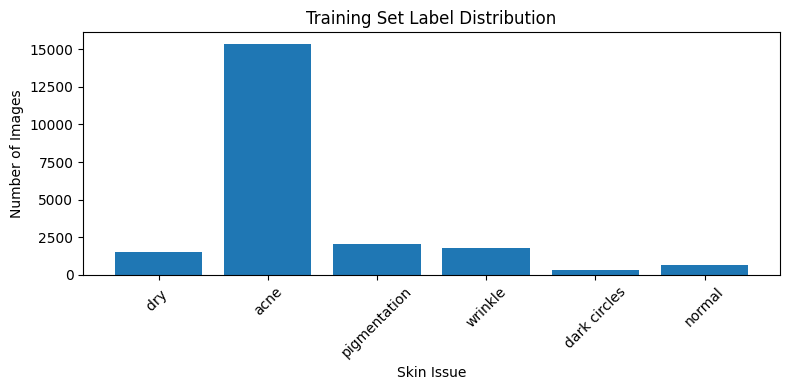

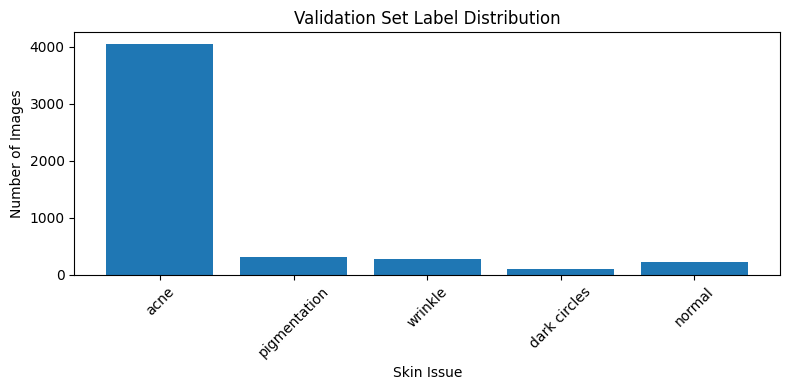

In [5]:
import matplotlib.pyplot as plt

# Check label distribution in training set
train_counts = train_df_filtered['label'].value_counts().sort_index()
train_labels = [index_to_label[i] for i in train_counts.index]

plt.figure(figsize=(8, 4))
plt.bar(train_labels, train_counts.values)
plt.title('Training Set Label Distribution')
plt.xlabel('Skin Issue')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check label distribution in validation set
val_counts = val_df_filtered['label'].value_counts().sort_index()
val_labels = [index_to_label[i] for i in val_counts.index]

plt.figure(figsize=(8, 4))
plt.bar(val_labels, val_counts.values)
plt.title('Validation Set Label Distribution')
plt.xlabel('Skin Issue')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Duplicated filenames in training set
train_duplicates = train_df_filtered[train_df_filtered.duplicated('filename')]
print(f"Duplicate filenames in training set: {len(train_duplicates)}")

# Duplicated filenames in validation set
val_duplicates = val_df_filtered[val_df_filtered.duplicated('filename')]
print(f"Duplicate filenames in validation set: {len(val_duplicates)}")


Duplicate filenames in training set: 18268
Duplicate filenames in validation set: 4237


In [7]:
import hashlib

def get_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

# Hashes for training images
train_hashes = train_df_filtered['image_path'].apply(get_image_hash)
train_df_filtered['img_hash'] = train_hashes
train_hash_dupes = train_df_filtered[train_df_filtered.duplicated('img_hash')]

# Hashes for validation images
val_hashes = val_df_filtered['image_path'].apply(get_image_hash)
val_df_filtered['img_hash'] = val_hashes
val_hash_dupes = val_df_filtered[val_df_filtered.duplicated('img_hash')]

# Cross-set duplicates
train_val_dupes = pd.merge(
    train_df_filtered[['img_hash', 'filename']],
    val_df_filtered[['img_hash', 'filename']],
    on='img_hash', how='inner', suffixes=('_train', '_val')
)

print(f"\nDuplicate images (same content) in training set: {len(train_hash_dupes)}")
print(f"Duplicate images (same content) in validation set: {len(val_hash_dupes)}")
print(f"Duplicate images shared between train and validation: {len(train_val_dupes)}")



Duplicate images (same content) in training set: 18275
Duplicate images (same content) in validation set: 4237
Duplicate images shared between train and validation: 64


In [8]:
# Drop duplicate image hashes within each set, keeping the first occurrence
train_unique = train_df_filtered.drop_duplicates(subset='img_hash', keep='first').copy()
val_unique = val_df_filtered.drop_duplicates(subset='img_hash', keep='first').copy()


In [9]:
# Find overlapping hashes
overlap_hashes = set(train_unique['img_hash']).intersection(set(val_unique['img_hash']))

# Remove overlapping hashes from both sets
train_unique = train_unique[~train_unique['img_hash'].isin(overlap_hashes)].copy()
val_unique = val_unique[~val_unique['img_hash'].isin(overlap_hashes)].copy()


In [10]:
print(f"Final unique images in training set: {len(train_unique)}")
print(f"Final unique images in validation set: {len(val_unique)}")

# Optional: Display first few remaining file names
print("\nSample unique training images:")
display(train_unique[['filename', 'label']].head())

print("\nSample unique validation images:")
display(val_unique[['filename', 'label']].head())


Final unique images in training set: 3430
Final unique images in validation set: 741

Sample unique training images:


,filename,label
0,kering_-106-_jpg.rf.f53b02543e8c83d72bdbd23bfe...,0
1,acne-164-_jpg.rf.d489e270699bc3b48705ce70e957d...,1
2,b654bd9575027729284d04b7be0508b8_jpg.rf.db1290...,2
3,acne-541-_jpeg.rf.6d5eda7a4a031c30d28a52d1385b...,1
4,acne-171-_jpeg.rf.84c389ffb5c7e766958417d6c2b5...,1



Sample unique validation images:


,filename,label
0,acne-160-_jpeg.rf.815883f2c4cb1bcc33105ab60693...,1
8,oily-228-_jpg.rf.0d72f9e2a782c6169fa76a41b1a47...,2
10,acne-146-_jpeg.rf.5f4f3263f81e3a3fd9735ada901c...,1
14,acne-511-_jpg.rf.eeb38c44ee632073999d616cf983e...,1
23,oily-239-_JPG.rf.ba6fcb140db75e36cd1c733e9803c...,2


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import mixed_precision

# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64


2025-08-11 03:59:30.767941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754884771.133368      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754884771.237517      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
def load_and_preprocess_image(path, label, augment=False):
    # Load and decode image
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Resize
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    
    # Normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # Optional data augmentation
    if augment:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_contrast(image, 0.8, 1.2)

    # Enforce shape
    image = tf.ensure_shape(image, [IMG_HEIGHT, IMG_WIDTH, 3])

    return image, label


In [13]:
# Training dataset with augmentation
train_ds = (
    tf.data.Dataset.from_tensor_slices((train_df_filtered['image_path'].values, train_df_filtered['label'].values))
    .map(lambda x, y: load_and_preprocess_image(x, y, augment=True), num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(100)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Validation dataset (no augmentation)
val_ds = (
    tf.data.Dataset.from_tensor_slices((val_df_filtered['image_path'].values, val_df_filtered['label'].values))
    .map(lambda x, y: load_and_preprocess_image(x, y, augment=False), num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


I0000 00:00:1754884788.327870      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754884788.328816      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [14]:
train_df_filtered['label']

0        0
1        1
2        2
3        1
4        1
        ..
21703    1
21704    3
21705    3
21706    3
21707    3
Name: label, Length: 21708, dtype: int64

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
'''history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stopping]
)'''


'history = model.fit(\n    train_ds,\n    validation_data=val_ds,\n    epochs=10,\n    callbacks=[early_stopping]\n)'

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Configurations
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64
num_classes = len(label_to_index)  # Make sure label_to_index is defined before this

# Data preprocessing function
def load_and_preprocess_image(path, label=None, training=True):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0

    if training:
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
        image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
        image = tf.image.random_flip_left_right(image)
    
    return (image, label) if label is not None else image

# Dataset pipelines
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df_filtered['image_path'].values, train_df_filtered['label'].values)
)
val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df_filtered['image_path'].values, val_df_filtered['label'].values)
)

train_ds = (
    train_ds
    .map(lambda x, y: load_and_preprocess_image(x, y, training=True), num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(lambda x, y: load_and_preprocess_image(x, y, training=False), num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Build model
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile model (fixed learning rate)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3,
    verbose=1, min_lr=1e-4  # Won't go below 1e-4
)
early_stop = EarlyStopping(
    monitor='val_loss', patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train once, no fine-tuning stage
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[reduce_lr, early_stop]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1754884802.014426     100 service.cc:148] XLA service 0x7d46180107e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754884802.016289     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754884802.016315     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754884802.990856     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/340 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.1914 - loss: 2.0074   

I0000 00:00:1754884809.372061     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


340/340 ━━━━━━━━━━━━━━━━━━━━ 232s 631ms/step - accuracy: 0.6831 - loss: 0.9807 - val_accuracy: 0.8538 - val_loss: 0.5025 - learning_rate: 1.0000e-04
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.8042 - loss: 0.6079 - val_accuracy: 0.8735 - val_loss: 0.4654 - learning_rate: 1.0000e-04
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.8260 - loss: 0.5196 - val_accuracy: 0.8737 - val_loss: 0.4558 - learning_rate: 1.0000e-04
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.8457 - loss: 0.4683 - val_accuracy: 0.8773 - val_loss: 0.4393 - learning_rate: 1.0000e-04
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.8588 - loss: 0.4179 - val_accuracy: 0.8813 - val_loss: 0.4340 - learning_rate: 1.0000e-04
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.8677 - loss: 0.3920 - val_accuracy: 0.8842 - val_loss: 0.4311 - learning_rate: 1.0000e-04
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accur

In [17]:
# Evaluate on validation or test data
mobilenet_eval = model.evaluate(val_ds)  # or test_ds
print(f"\n[mobilenetv0 Evaluation] - Loss: {mobilenet_eval[0]:.4f}, Accuracy: {mobilenet_eval[1]*100:.2f}%")


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8691 - loss: 0.4593

[mobilenetv0 Evaluation] - Loss: 0.4221, Accuracy: 87.69%


In [18]:
###-------------Saving Model-------------

In [19]:
# Save the entire model as a .h5 file
model.save('mobilenet_model.h5')
print("model saved")

model saved


In [20]:
###--------Testing--------------

In [21]:
##--------Just Prediction-------------- 

In [22]:
# Upload widget (Kaggle/Colab style)
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')

In [37]:
import tensorflow as tf

# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Preprocess logic (used during both training and inference)
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

    img = tf.cast(img, tf.float32) / 255.0

    # Adjust brightness
    img = tf.image.adjust_brightness(img, delta=0.05)

    # Adjust contrast
    img = tf.image.adjust_contrast(img, contrast_factor=1.1)

    # Adjust saturation (vibrance)
    img = tf.image.adjust_saturation(img, saturation_factor=1.05)

    return img

# Wrapper to prepare image for prediction
def preprocess_test_image(img_path):
    img = load_and_preprocess_image(img_path)
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [38]:
# Load your model
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/mobilenet_model.h5')

# Label mapping
index_to_label = {
    0: 'dry',
    1: 'acne',
    2: 'pigmentation',
    3: 'wrinkle',
    4: 'dark circles',
    5: 'normal'
}

# Predict function
def predict_uploaded_image(model, index_to_label, uploader):
    if len(uploader.value) == 0:
        print("Upload an image first!")
        return
    
    file_info = uploader.value[0]
    filename = file_info['name']
    content = file_info['content']
    
    with open(filename, 'wb') as f:
        f.write(content)
    print(f"Saved file as {filename}")

    img = preprocess_test_image(filename)

    preds = model.predict(img)[0]

    for i, prob in enumerate(preds):
        print(f"{index_to_label[i]}: {prob*100:.2f}%")
    top_idx = preds.argmax()
    print(f"Top prediction: {index_to_label[top_idx]} ({preds[top_idx]*100:.2f}%)")

# Finally call it
predict_uploaded_image(model, index_to_label, uploader)


Saved file as 360_F_101706549_xEwI5fZ52KpA40NiulzMk5qFXiGpV3FI.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
dry: 2.50%
acne: 40.45%
pigmentation: 31.90%
wrinkle: 3.47%
dark circles: 8.31%
normal: 13.38%
Top prediction: acne (40.45%)


In [31]:
#-----------Prediction with heatmap---------------

In [32]:
from IPython.display import display
import ipywidgets as widgets
import tensorflow as tf
import numpy as np

# Upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')

In [34]:
# After uploading, get the image bytes like this:
def get_image_tensor_from_upload(uploader):
    if len(uploader.value) == 0:
        print("Please upload an image first.")
        return None
    
    uploaded_file = uploader.value[0]
    img_bytes = uploaded_file['content']
    
    # Convert memoryview to bytes explicitly
    img = tf.image.decode_image(bytes(img_bytes), channels=3)
    
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.expand_dims(img, axis=0)
    
    return img

# Wait until you upload, then call this function:
img_tensor = get_image_tensor_from_upload(uploader)

if img_tensor is not None:
    print("Image tensor ready:", img_tensor.shape)
else:
    print("No image tensor generated.")

Image tensor ready: (1, 224, 224, 3)


In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Predict the class from the tensor
def predict_image_class(img_tensor, model):
    preds = model(img_tensor, training=False)
    predicted_class = tf.argmax(preds[0])
    confidence = tf.reduce_max(tf.nn.softmax(preds[0]))
    return predicted_class.numpy(), confidence.numpy()

# 2. Generate Grad-CAM heatmap
# First get the MobileNetV2 base model inside your model
base_model = model.get_layer('mobilenetv2_1.00_224')

# Now build a grad_model from the base_model and your full model outputs
def make_gradcam_heatmap(img_tensor, model, last_conv_layer_name, pred_index=None):
    # Get the base model (MobileNetV2) inside your full model
    base_model = model.get_layer('mobilenetv2_1.00_224')

    # Create a new model that takes the full model's input and outputs:
    # - The activation from the last conv layer inside the base model
    # - The final predictions of the full model
    grad_model = tf.keras.models.Model(
    inputs=base_model.input,
    outputs=[base_model.get_layer('Conv_1').output, base_model.output]
)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    # Weight conv outputs by pooled gradients
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap to [0,1]
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

# 3. Overlay heatmap on image and display/save
def overlay_gradcam_heatmap(img_tensor, heatmap, alpha=0.4, save_path=None):
    img = img_tensor[0].numpy()
    img = np.uint8(255 * img)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img, 1 - alpha, 0)

    plt.imshow(superimposed_img[..., ::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.show()

    if save_path:
        cv2.imwrite(save_path, superimposed_img)

pred_class, confidence = predict_image_class(img_tensor, model)
print(f"Predicted class: {pred_class}, Confidence: {confidence:.4f}")

heatmap = make_gradcam_heatmap(img_tensor, model, last_conv_layer_name='Conv_1', pred_index=pred_class)

# 4. Print all class predictions with percentages, sorted high to low
def print_sorted_predictions(preds, index_to_label):
    pred_percentages = tf.nn.softmax(preds[0]).numpy() * 100
    sorted_indices = np.argsort(pred_percentages)[::-1]
    
    print("Class predictions (sorted):")
    for i in sorted_indices:
        print(f"{index_to_label[i]}: {pred_percentages[i]:.2f}%")
    
    top_idx = sorted_indices[0]
    print(f"\nTop prediction: {index_to_label[top_idx]} ({pred_percentages[top_idx]:.2f}%)")
    return top_idx

# 5. Predict class and return full sorted info plus top class index
def predict_and_sort_classes(img_tensor, model, index_to_label):
    preds = model(img_tensor, training=False)
    top_idx = print_sorted_predictions(preds, index_to_label)
    return preds, top_idx

# 6. Overlay heatmap with colorbar legend for confidence
def overlay_gradcam_with_legend(img_tensor, heatmap, alpha=0.4, save_path=None):
    img = img_tensor[0].numpy()
    img = np.uint8(255 * img)

    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img, 1 - alpha, 0)

    plt.imshow(superimposed_img[..., ::-1])  # BGR to RGB
    plt.axis('off')

    # Add colorbar legend
    mappable = plt.cm.ScalarMappable(cmap='jet')
    mappable.set_array(heatmap)
    plt.colorbar(mappable, fraction=0.046, pad=0.04, label='Activation intensity')
    
    plt.show()

    if save_path:
        cv2.imwrite(save_path, superimposed_img)


Predicted class: 1, Confidence: 0.2075


Class predictions (sorted):
acne: 20.75%
pigmentation: 19.57%
normal: 15.85%
dark circles: 15.08%
wrinkle: 14.47%
dry: 14.28%

Top prediction: acne (20.75%)


/tmp/ipykernel_36/189071685.py:108: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, fraction=0.046, pad=0.04, label='Activation intensity')


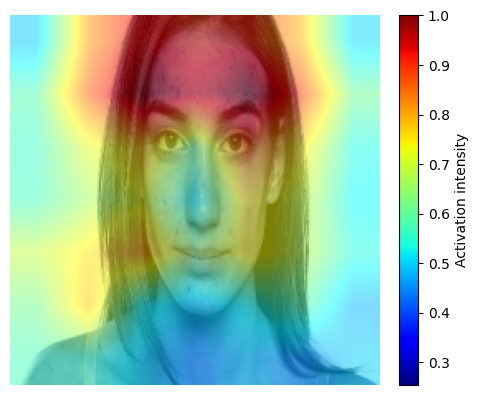

In [36]:
index_to_label = {
    0: 'dry',
    1: 'acne',
    2: 'pigmentation',
    3: 'wrinkle',
    4: 'dark circles',
    5: 'normal'
}

# Predict and get sorted info + top index
preds, top_pred_idx = predict_and_sort_classes(img_tensor, model, index_to_label)

# Make heatmap with top class index
heatmap = make_gradcam_heatmap(img_tensor, model, last_conv_layer_name='Conv_1', pred_index=top_pred_idx)

# Overlay heatmap with legend
overlay_gradcam_with_legend(img_tensor, heatmap, alpha=0.5)


In [ ]:
#----------Prediction heatmap for each feature---------------

In [39]:
import cv2
import tensorflow as tf
import numpy as np

index_to_label = {
    0: 'dry',
    1: 'acne',
    2: 'pigmentation',
    3: 'wrinkle',
    4: 'dark circles',
    5: 'normal'
}

def crop_face(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image not found or unreadable at {img_path}")
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        print("No face detected, resizing full image.")
        img = cv2.resize(img, (224, 224))
        return img

    x, y, w, h = faces[0]
    face_img = img[y:y+h, x:x+w]
    face_img = cv2.resize(face_img, (224, 224))
    return face_img

def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.adjust_brightness(img, delta=0.05)
    img = tf.image.adjust_contrast(img, contrast_factor=1.1)
    img = tf.image.adjust_saturation(img, saturation_factor=1.05)

    img_tensor = tf.expand_dims(img, axis=0)
    return img_tensor

def predict_classes(img_tensor, model):
    preds = model.predict(img_tensor)
    probs = tf.nn.softmax(preds[0]).numpy()
    return probs

def make_gradcam_heatmap(img_tensor, model, last_conv_layer_name, pred_index):
    base_model = model.get_layer('mobilenetv2_1.00_224')
    grad_model = tf.keras.models.Model(
        inputs=base_model.input,
        outputs=[base_model.get_layer(last_conv_layer_name).output, base_model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    max_val = tf.reduce_max(heatmap)
    return heatmap.numpy() / max_val.numpy() if max_val > 0 else heatmap.numpy()

def overlay_heatmap_on_image(img, heatmap, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img, 1 - alpha, 0)
    return superimposed_img


In [40]:
import matplotlib.pyplot as plt

#just plotting logic
def run_full_pipeline(img_path, model, last_conv_layer_name='Conv_1'):
    face_img = crop_face(img_path)
    img_tensor = preprocess_image(face_img)
    probs = predict_classes(img_tensor, model)

    sorted_indices = np.argsort(probs)[::-1]
    print("Class predictions (sorted):")
    for idx in sorted_indices:
        print(f"{index_to_label[idx]}: {probs[idx]*100:.2f}%")

    plt.figure(figsize=(18, 10))
    for i in range(len(index_to_label)):
        heatmap = make_gradcam_heatmap(img_tensor, model, last_conv_layer_name, pred_index=i)
        superimposed = overlay_heatmap_on_image(face_img.copy(), heatmap)

        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
        plt.title(f"{index_to_label[i]} ({probs[i]*100:.2f}%)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [41]:
import ipywidgets as widgets
from IPython.display import display

# Create uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')

In [42]:
import os

def save_uploaded_file_and_run(uploader, model):
    if len(uploader.value) == 0:
        print("Please upload an image first.")
        return
    
    # If uploader.value is a tuple, access first element directly
    uploaded_file = uploader.value[0]  # tuple element
    
    # This depends on your uploader structure; let's print to debug:
    print(f"Uploaded file info type: {type(uploaded_file)}")
    
    # Try to access bytes content depending on uploader format:
    if isinstance(uploaded_file, dict):
        # old format, dict with 'content'
        content = uploaded_file['content']
        filename = uploaded_file.get('name', 'uploaded_image.jpg')
    elif isinstance(uploaded_file, bytes) or isinstance(uploaded_file, memoryview):
        # Direct bytes or memoryview
        content = uploaded_file
        filename = 'uploaded_image.jpg'
    else:
        # Could be a tuple/list of (filename, bytes) or a custom object
        # Try unpacking if tuple
        if isinstance(uploaded_file, tuple) and len(uploaded_file) == 2:
            filename, content = uploaded_file
        else:
            raise ValueError("Unexpected uploader value format")
    
    # Save to local file
    with open(filename, "wb") as f:
        f.write(content)
    
    print(f"Image saved to {filename}, running pipeline...")
    
    run_full_pipeline(filename, model)



Uploaded file info type: <class 'traitlets.utils.bunch.Bunch'>
Image saved to 360_F_101706549_xEwI5fZ52KpA40NiulzMk5qFXiGpV3FI.jpg, running pipeline...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class predictions (sorted):
acne: 20.97%
pigmentation: 18.82%
dark circles: 16.11%
normal: 15.56%
dry: 14.32%
wrinkle: 14.21%


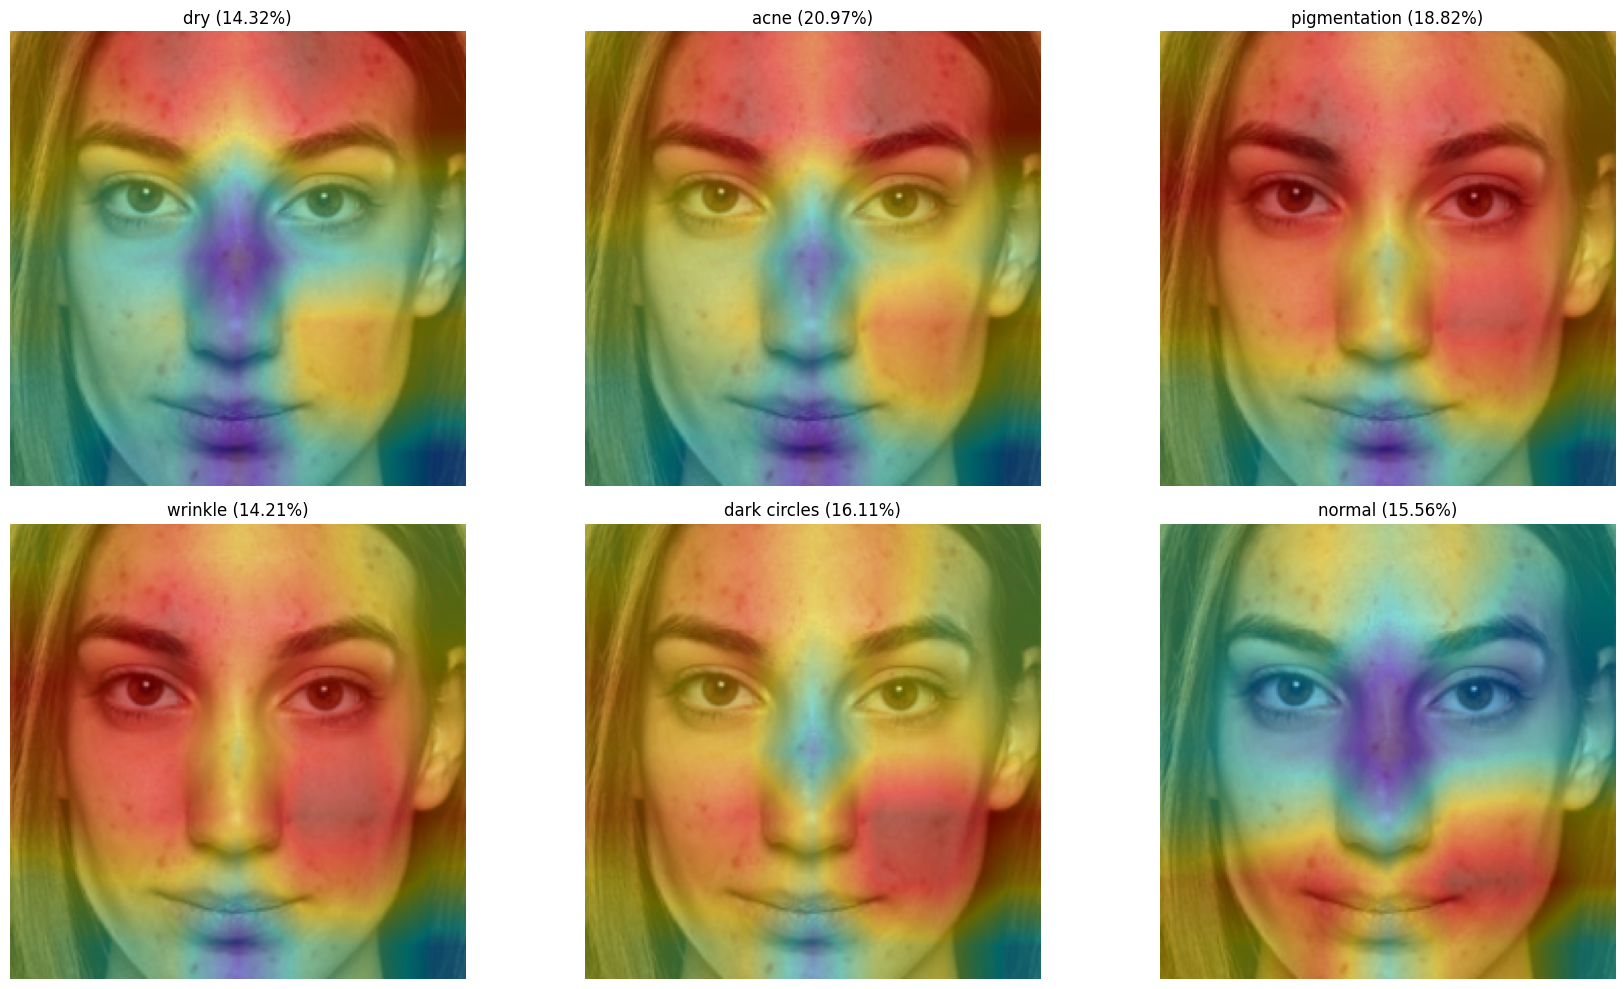

In [43]:
# After uploading image, run:
save_uploaded_file_and_run(uploader, model)
